In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_context('paper', font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('colorblind')


In [3]:
res = pd.read_excel('/data/HomographDisambiguation-DetailedStatistics-75Pairs_B.xlsx', header=[0,1,2])
res = pd.concat([res.xs('setup', axis=1, level=2),res.xs('model', axis=1, level=2),res.xs('Avg-F1', axis=1, level=2)], axis=1)
res.columns = res.columns.droplevel(1)
res.head()

,setup,model,אחדות,אם,אמרה,אפשר,אחיו,אמצעי,את,אהבה,...,שאלה,שמן,שכר,שירת,שם,שאף,שבה,שמר,תנאי,כיוון
0,EMNLPBaseline,EMNLPBaseline,0.966411,0.923328,0.914735,0.960206,0.946418,0.914567,0.972604,0.956338,...,0.968459,0.971525,0.933584,0.945164,0.899737,0.962811,0.961173,0.953105,0.983771,0.991148
1,MLP 10-fold CV,alephbert_Masked,0.987369,0.979087,0.961364,0.971556,0.962271,0.933140,0.986641,0.982274,...,0.981313,0.960945,0.956271,0.976768,0.971496,0.979437,0.994170,0.982934,0.970697,0.991215
2,MLP 10-fold CV,alephbert_Unmasked,0.988350,0.980588,0.965269,0.976096,0.956098,0.932148,0.983571,0.982825,...,0.982258,0.958781,0.956286,0.976768,0.970822,0.978187,0.994174,0.983848,0.971295,0.989830
3,MLP 10-fold CV,hebert_Masked,0.984319,0.972923,0.960418,0.969353,0.961593,0.932645,0.984048,0.979308,...,0.976861,0.956768,0.958133,0.976255,0.965920,0.978793,0.990695,0.981004,0.970150,0.986589
4,MLP 10-fold CV,hebert_Unmasked,0.986850,0.974475,0.960496,0.974597,0.950609,0.935694,0.980973,0.982250,...,0.978633,0.949682,0.953570,0.975716,0.965238,0.976908,0.993024,0.979585,0.972382,0.988541


In [4]:
homs = pd.read_excel('data/ListOfHomographs2022-02--WithWordPieces.xlsx')
homs['ratio_f'] = homs.Ratio.apply(lambda x: float(x.split(':')[0])/float(x.split(':')[-1]))
homs.head()

,Unvocalized,Category,Ratio,# Options,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,#WordPieces,Rare options,ratio_f
0,הזמר,Semantic,1:2,2,הַזֶּמֶר (1000),הַזַּמָּר (1000),NaN,NaN,NaN,2,NaN,0.500000
1,הסופר,Semantic,1:13.429,2,הַסּוֹפֵר (783),הַסּוּפֶּר (1000),NaN,NaN,NaN,2,NaN,0.074466
2,זמר,Semantic,1:1.034,2,זַמָּר (1000),זֶמֶר (609),NaN,NaN,NaN,2,זַמַּר (נסמך),0.967118
3,חברה,Semantic,1:4.444,2,חֶבְרָה (1000),חֲבֵרָה (1000),NaN,NaN,NaN,1,NaN,0.225023
4,רשות,Semantic,1:1.89,2,רְשׁוּת (1000),רָשׁוּת (1000),NaN,NaN,NaN,2,NaN,0.529101


In [5]:
res = res.melt(id_vars=['setup', 'model'], var_name='hom', value_name='f1', col_level=0, ignore_index=False)
res['train_size'] = res.setup.str.extract('(\d+-[Ss]ample)')
res['shot'] = res.setup.str.extract('(\d+-[Ss]hot)')
res['classifier'] = res.setup.apply(lambda x: 'Centroid' if 'cent' in x.lower() else 'MLP')
res = res.merge(homs[['Unvocalized', 'Category', 'ratio_f', '# Options', '#WordPieces']], left_on='hom', right_on='Unvocalized')
res.head()

,setup,model,hom,f1,train_size,shot,classifier,Unvocalized,Category,ratio_f,# Options,#WordPieces
0,EMNLPBaseline,EMNLPBaseline,אחדות,0.966411,NaN,NaN,MLP,אחדות,Morph,0.958773,2,2
1,MLP 10-fold CV,alephbert_Masked,אחדות,0.987369,NaN,NaN,MLP,אחדות,Morph,0.958773,2,2
2,MLP 10-fold CV,alephbert_Unmasked,אחדות,0.988350,NaN,NaN,MLP,אחדות,Morph,0.958773,2,2
3,MLP 10-fold CV,hebert_Masked,אחדות,0.984319,NaN,NaN,MLP,אחדות,Morph,0.958773,2,2
4,MLP 10-fold CV,hebert_Unmasked,אחדות,0.986850,NaN,NaN,MLP,אחדות,Morph,0.958773,2,2


In [6]:
res.groupby(['model', 'setup']).f1.agg(['mean', 'std']).reset_index().sort_values('mean', ascending=False).head(20)

,model,setup,mean,std
11,alephbert_Masked,MLP 10-fold CV,0.963173,0.029948
26,alephbert_Unmasked,MLP 10-fold CV,0.962736,0.033472
36,hebert_Masked,MLP 10-fold CV,0.959997,0.032000
46,hebert_Unmasked,MLP 10-fold CV,0.958934,0.034891
27,alephbert_Unmasked,MLP 100-Sample Train,0.953782,0.038737
12,alephbert_Masked,MLP 100-Sample Train,0.952216,0.044178
14,alephbert_Masked,MLP 50-Sample Train,0.951257,0.042370
37,hebert_Masked,MLP 100-Sample Train,0.949040,0.041277
29,alephbert_Unmasked,MLP 50-Sample Train,0.948862,0.046126
13,alephbert_Masked,MLP 25-Sample Train,0.947059,0.047938


## Table 1: Comparison of prev SOTA and BERT models

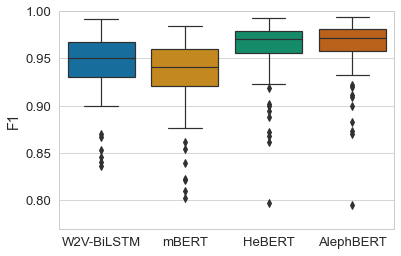

In [7]:
mod_data = (res[~(res.model.str.contains('sum')) 
          & ~(res.model.str.contains('avg')) 
          & (((res.setup=='MLP 10-fold CV') & (res.model.str.contains('bert_Un')))
             | (res.setup.str.contains('EMNLP')))]
     .assign(model = lambda x: x.model.str.replace('_first|_Unmasked', '', regex=True))
     .assign(model = lambda x: x.model.map({'EMNLPBaseline': 'W2V-BiLSTM', 'mbert': 'mBERT', 'hebert': 'HeBERT', 'alephbert': 'AlephBERT'}))
    
     )
ax = sns.boxplot(x="model", y="f1", data=mod_data, order=['W2V-BiLSTM', 
                                                          'mBERT', 'HeBERT', 'AlephBERT'])
ax.set_xlabel('')
ax.set_ylabel('F1')
ax.set_ylim(0.77,1)
plt.savefig('figures/bert_vs_prev_sota_boxplot.svg')


(0.77, 1.0)

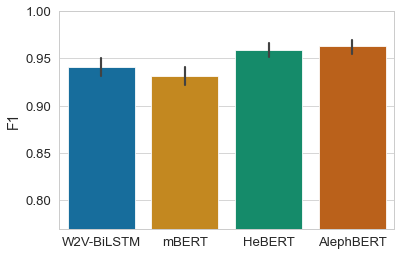

In [8]:
ax = sns.barplot(x="model", y="f1", data=mod_data, order=['W2V-BiLSTM', 
                                                          'mBERT', 'HeBERT', 'AlephBERT'])
ax.set_xlabel('')
ax.set_ylabel('F1')
ax.set_ylim(0.77,1)

In [9]:
mod_data.shape

(300, 12)

## Table 2: Few Shot

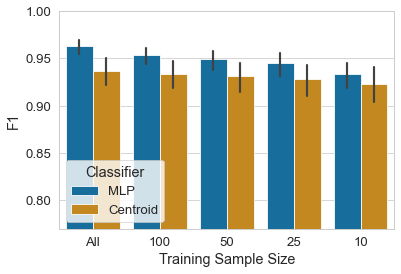

In [10]:
few_data = (res[(res.model.str.contains('alephbert_Un')) 
                & ((res.setup=='MLP 10-fold CV') | (res.setup=='Centroids 10-fold CV') | (res.setup.str.lower().str.contains('sample')))
              ]
     .assign(model = lambda x: x.model.str.replace('_first|_Unmasked', '', regex=True))
     .rename(columns={'classifier': 'Classifier'})
     ).fillna('All')
few_data['train_size'] = few_data.train_size.str.replace('-Sample', '')
ax = sns.barplot(x="train_size", y="f1", data=few_data, hue='Classifier')

ax.set_xlabel('Training Sample Size')
ax.set_ylabel('F1')
ax.set_ylim(0.77,1)
plt.savefig('figures/few_shot_barplot.svg')


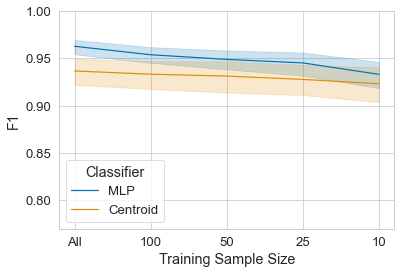

In [11]:
ax = sns.lineplot(x="train_size", y="f1", data=few_data, hue='Classifier')

ax.set_xlabel('Training Sample Size')
ax.set_ylabel('F1')
ax.set_ylim(0.77,1)
plt.savefig('figures/few_shot_lineplot.svg')


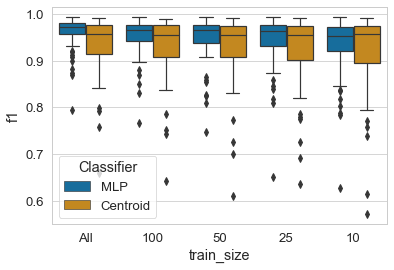

In [12]:
ax = sns.boxplot(x="train_size", y="f1", data=few_data, hue='Classifier')


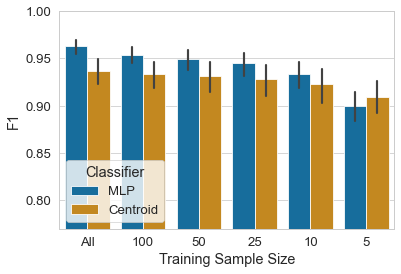

In [27]:
shot_data = (res[(res.model.str.contains('alephbert_Un')) 
                & ((res.setup=='MLP 10-fold CV') | (res.setup=='Centroids 10-fold CV') | (res.setup.str.lower().str.contains('shot')) | (res.setup.str.lower().str.contains('sample')))
              ]
     .assign(model = lambda x: x.model.str.replace('_first|_Unmasked', '', regex=True))
     .rename(columns={'classifier': 'Classifier'})
     )
shot_data['shot'] = shot_data.shot.str.replace('-Shot', '')
shot_data['shot'] = (shot_data.train_size.str.replace('-Sample', '')
                     .combine_first(shot_data.shot)
                     .fillna('All'))
ax = sns.barplot(x="shot", y="f1", data=shot_data[~(shot_data.shot.isin(['1','4']))], hue='Classifier')

ax.set_xlabel('Training Sample Size')
ax.set_ylabel('F1')
ax.set_ylim(0.77,1)
plt.savefig('figures/new_few_shot_barplot.svg')


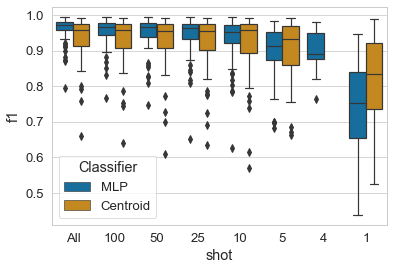

In [14]:
ax = sns.boxplot(x="shot", y="f1", data=shot_data, hue='Classifier')


## Table 3: Homograph Category

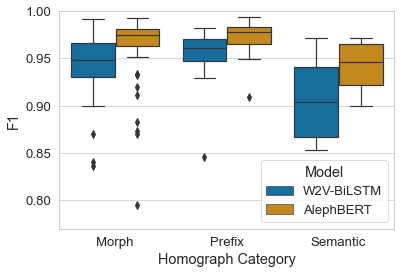

In [15]:
res.Category = res.Category.apply(lambda x: x.split()[0])
category_data = (res[((res.setup.str.contains('MLP 10-fold CV')) 
                  & (res.model.str.contains('alephbert_Unmasked')))
                     |(res.model.str.contains('EMNLPBaseline'))]
     .assign(model = lambda x: x.model.str.replace('_first|_Unmasked', '', regex=True))
     .assign(model = lambda x: x.model.map({'EMNLPBaseline': 'W2V-BiLSTM', 'mbert': 'mBERT', 'hebert': 'HeBERT', 'alephbert': 'AlephBERT'}))
     .rename(columns={'model': 'Model'})
                )
ax = sns.boxplot(data=category_data, x='Category', y='f1', hue='Model')

ax.set_ylabel('F1')
ax.set_xlabel('Homograph Category')
ax.set_ylim(0.77,1)
plt.savefig('figures/homograph_category_boxplot.svg')


(0.77, 1.0)

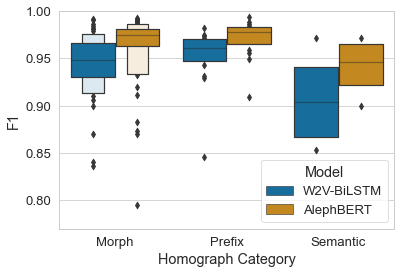

In [16]:
ax = sns.boxenplot(data=category_data, x='Category', y='f1', hue='Model')

ax.set_ylabel('F1')
ax.set_xlabel('Homograph Category')
ax.set_ylim(0.77,1)

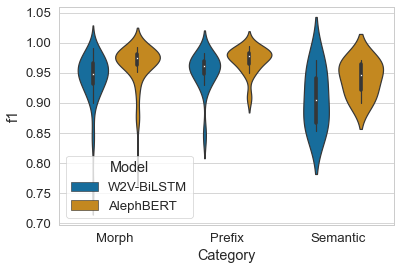

In [17]:
ax = sns.violinplot(data=category_data, x='Category', y='f1', hue='Model')


## Word-Pieces

C:\Users\dbare\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


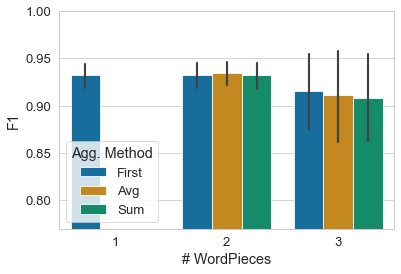

In [18]:
wp_data = (res[(res.model.str.contains('mbert_Un'))
               & (res.setup.str.contains('MLP 10-fold CV'))
               #& (res.model.str.contains('first'))
              ])
wp_data['Agg. Method'] = wp_data.model.apply(lambda x: x.split('_')[-1].capitalize())
ax = sns.barplot(x="#WordPieces", y="f1", data=wp_data, hue='Agg. Method')

ax.set_xlabel('# WordPieces')
ax.set_ylabel('F1')
ax.set_ylim(0.77,1)
plt.savefig('figures/wordpiece_barplot.svg')


In [19]:
wp_data.shape

(225, 13)

## Table: 5 Ratio (in natural text) & Masked vs. Unmasked

In [20]:
ratio_data = (res[(res.setup.str.contains('MLP 10-fold CV')) 
                  & (res.model.str.contains('leph'))]
     .assign(model = lambda x: x.model.map({'alephbert_Masked': 'AlephBERT (Masked)', 'alephbert_Unmasked': 'AlephBERT (Unmasked)'}))
     .rename(columns={'model': 'Model'})
              .assign(ratio_f=lambda x: 1/x.ratio_f))

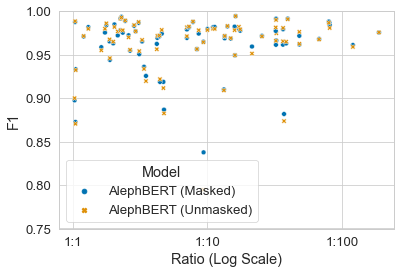

In [21]:
import matplotlib.ticker as ticker

g = sns.scatterplot(data=ratio_data, x="ratio_f", y="f1", 
                    hue='Model', style='Model',
                    estimator='x')
# Rewrite the y labels
g.set_xscale('log')
g.xaxis.set_major_formatter(ticker.FormatStrFormatter('1:%d'))
g.set_xlabel('Ratio (Log Scale)')
g.set_ylabel('F1')
g.set_ylim(0.75,1)

plt.savefig('figures/ratio_and_mask_scatter.svg')


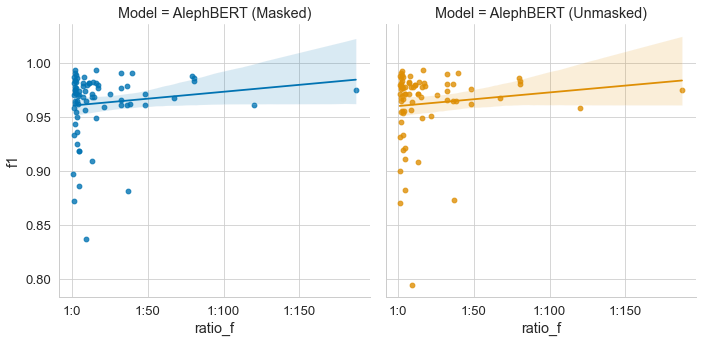

In [22]:
g = sns.lmplot (data=ratio_data, x="ratio_f", y="f1", 
                    col='Model', hue='Model',
                    #estimator='x')
               )
# Rewrite the x labels
#g.set_xscale('log')
g.axes[0,1].xaxis.set_major_formatter(ticker.FormatStrFormatter('1:%d'))

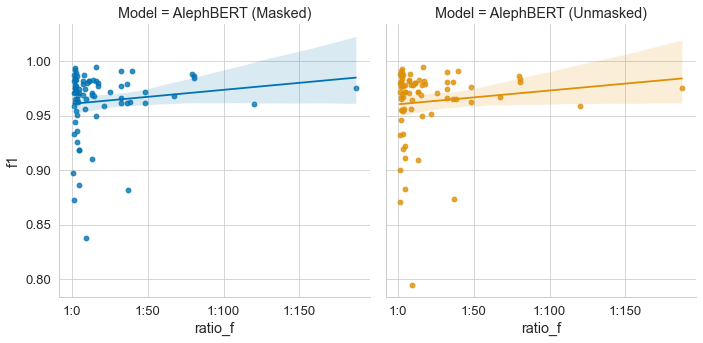

In [23]:
g = sns.lmplot (data=ratio_data, x="ratio_f", y="f1", 
                    col='Model', hue='Model',
                    #estimator='x')
               )
# Rewrite the x labels
#g.set_xscale('log')
g.axes[0,1].xaxis.set_major_formatter(ticker.FormatStrFormatter('1:%d'))

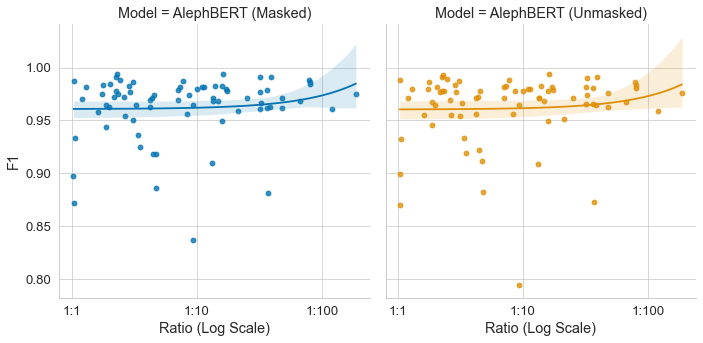

In [24]:
g = sns.lmplot (data=ratio_data, x="ratio_f", y="f1", 
                    col='Model', hue='Model',
                    #estimator='x')
               )
# Rewrite the x labels
g.axes[0,0].set_xscale('log')
g.axes[0,1].set_xscale('log')
g.axes[0,1].xaxis.set_major_formatter(ticker.FormatStrFormatter('1:%d'))
g.axes[0,0].set_xlabel('Ratio (Log Scale)')
g.axes[0,1].set_xlabel('Ratio (Log Scale)')
#plt.suptitle('Ratio Between Analyses in Natural Text (log scale)')
g.axes[0,0].set_ylabel('F1')
plt.savefig('figures/ratio_and_mask_dual_regression.svg')


## Table 6: # Analyses 

C:\Users\dbare\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


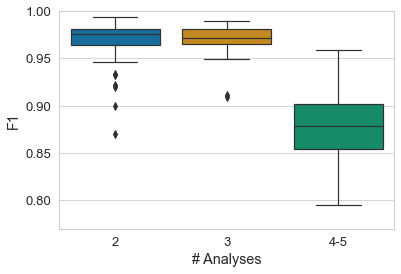

In [25]:
an_data = (res[(res.setup.str.contains('MLP 10-fold CV')) 
                  & (res.model.str.contains('lephbert_Un'))])

an_data['# Analyses'] = an_data['# Options'].apply(lambda x: '4-5' if x>=4 else str(x)) 

ax = sns.boxplot(data=an_data, x='# Analyses', y='f1')
ax.set_ylabel('F1')
ax.set_ylim(0.77,1)
plt.savefig('figures/num_analyses_boxplot.svg')


## What doesn't work?

In [26]:
(res[((res.setup.str.contains('MLP 10-fold CV')) 
                  & (res.model.str.contains('alephbert_Unmasked')))]
 .sort_values('f1', ascending=True)).head(20)

,setup,model,hom,f1,train_size,shot,classifier,Unvocalized,Category,ratio_f,# Options,#WordPieces
6002,MLP 10-fold CV,alephbert_Unmasked,פרס,0.794690,NaN,NaN,MLP,פרס,Morph,0.106838,4,1
5202,MLP 10-fold CV,alephbert_Unmasked,נעשה,0.870376,NaN,NaN,MLP,נעשה,Morph,0.953289,2,1
1302,MLP 10-fold CV,alephbert_Unmasked,בקרב,0.873520,NaN,NaN,MLP,בקרב,Morph,0.027027,4,1
3302,MLP 10-fold CV,alephbert_Unmasked,חברות,0.882413,NaN,NaN,MLP,חברות,Morph,0.209996,5,1
3102,MLP 10-fold CV,alephbert_Unmasked,זמר,0.899883,NaN,NaN,MLP,זמר,Semantic,0.967118,2,2
2302,MLP 10-fold CV,alephbert_Unmasked,המראה,0.908817,NaN,NaN,MLP,המראה,Prefix,0.075472,3,3
1502,MLP 10-fold CV,alephbert_Unmasked,די,0.911456,NaN,NaN,MLP,די,Morph,0.212269,3,1
5102,MLP 10-fold CV,alephbert_Unmasked,מראה,0.919500,NaN,NaN,MLP,מראה,Morph,0.285714,2,2
3202,MLP 10-fold CV,alephbert_Unmasked,חברה,0.921718,NaN,NaN,MLP,חברה,Semantic,0.225023,2,1
502,MLP 10-fold CV,alephbert_Unmasked,אמצעי,0.932148,NaN,NaN,MLP,אמצעי,Morph,0.948767,2,2
